#  Motiva√ß√£o

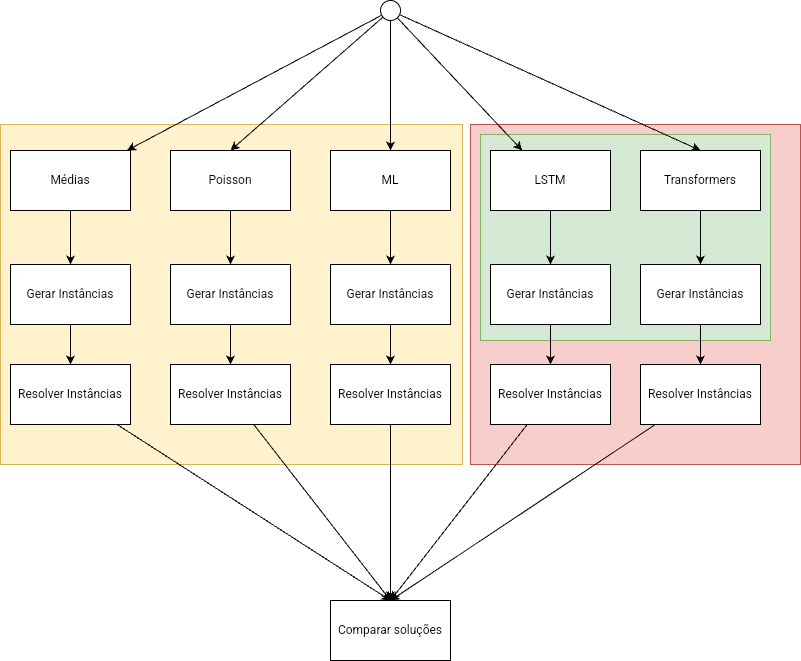

## 0. Imports and configs


In [ ]:
import pickle
from datetime import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Layer, Input, Dense, LSTM, LayerNormalization, Dropout, MultiHeadAttention, Add
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import register_keras_serializable



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TEST_SIZE = 0.20
SEED = 42

## 1. Loading and split data

### 1.1 Loading data

In [ ]:
ROOT_PATH = "/content/drive/MyDrive/Bike4Real/data/"
# ROOT_PATH = "/kaggle/input/"
X_path = ROOT_PATH + "X_cp.pkl"
y_path = ROOT_PATH + "y_cp.pkl"

In [ ]:
try:
  with open(X_path, 'rb') as file:
    X = pickle.load(file)
  print("X loaded successfully!")

  with open(y_path, 'rb') as file:
    y = pickle.load(file)
  print("y loaded successfully!")

except FileNotFoundError:
  print(f"Error: One or both of the files were not found. \nCheck the file paths: {X_path}, {y_path}")
except Exception as e:
  print(f"An error occurred: {e}")


X loaded successfully!
y loaded successfully!


In [ ]:
X.shape, y.shape

((1390777, 10, 12), (1390777, 1, 12))

In [ ]:
X[1, :, :]

array([[0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 2.000e+00,
        5.800e+01, 2.024e+03, 4.000e+00, 1.800e+01, 2.000e+00, 5.800e+01],
       [0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00,
        3.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00, 4.000e+00],
       [0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00,
        4.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00, 5.000e+00],
       [0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00,
        6.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00, 6.000e+00],
       [0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00,
        6.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00, 6.000e+00],
       [0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00,
        6.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00, 7.000e+00],
       [0.000e+00, 0.000e+00, 2.024e+03, 4.000e+00, 1.800e+01, 3.000e+00,
        7.000e+00, 2.024e+03, 4.

### 1.2 Split Data

In [ ]:
x_shape = X.shape
y_shape = y.shape

# Criando os escaladores
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape necess√°rio para manter a compatibilidade
X = X.reshape(-1, X.shape[-1])  # Transforma para (total_samples * timesteps, features)
y = y.reshape(-1, y.shape[-1])  # Transforma para (total_samples * timesteps, features)

# Aplicando a normaliza√ß√£o
X = scaler_x.fit_transform(X).reshape(x_shape)
y = scaler_y.fit_transform(y).reshape(y_shape)


In [ ]:
X.shape

(1390777, 10, 12)

In [ ]:
y[1, :, :]

array([[0.        , 0.        , 0.        , 0.6       , 0.6       ,
        0.13043478, 0.59322034, 0.        , 0.6       , 0.6       ,
        0.13043478, 0.6440678 ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

## 2. LSTM

In [ ]:
model_lstm = Sequential([
    LSTM(256, return_sequences=True, input_shape=(10, 12)),
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=False),

    # Camada totalmente conectada
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(12, activation='relu')
])

In [ ]:
# Compila√ß√£o
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=["mae", "mse"])

In [ ]:
model_lstm.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_3 (LSTM)                        ‚îÇ (None, 10, 256)             ‚îÇ         275,456 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_4 (LSTM)                        ‚îÇ (None, 10, 128)             ‚îÇ         197,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_5 (LSTM)                        ‚îÇ (None, 128)                 ‚îÇ         131,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                      ‚îÇ (None, 128)                 ‚îÇ          16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                      ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                      ‚îÇ (None, 32)                  ‚îÇ           2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                      ‚îÇ (None, 12)                  ‚îÇ             396 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 631,404 (2.41 MB)

 Trainable params: 631,404 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

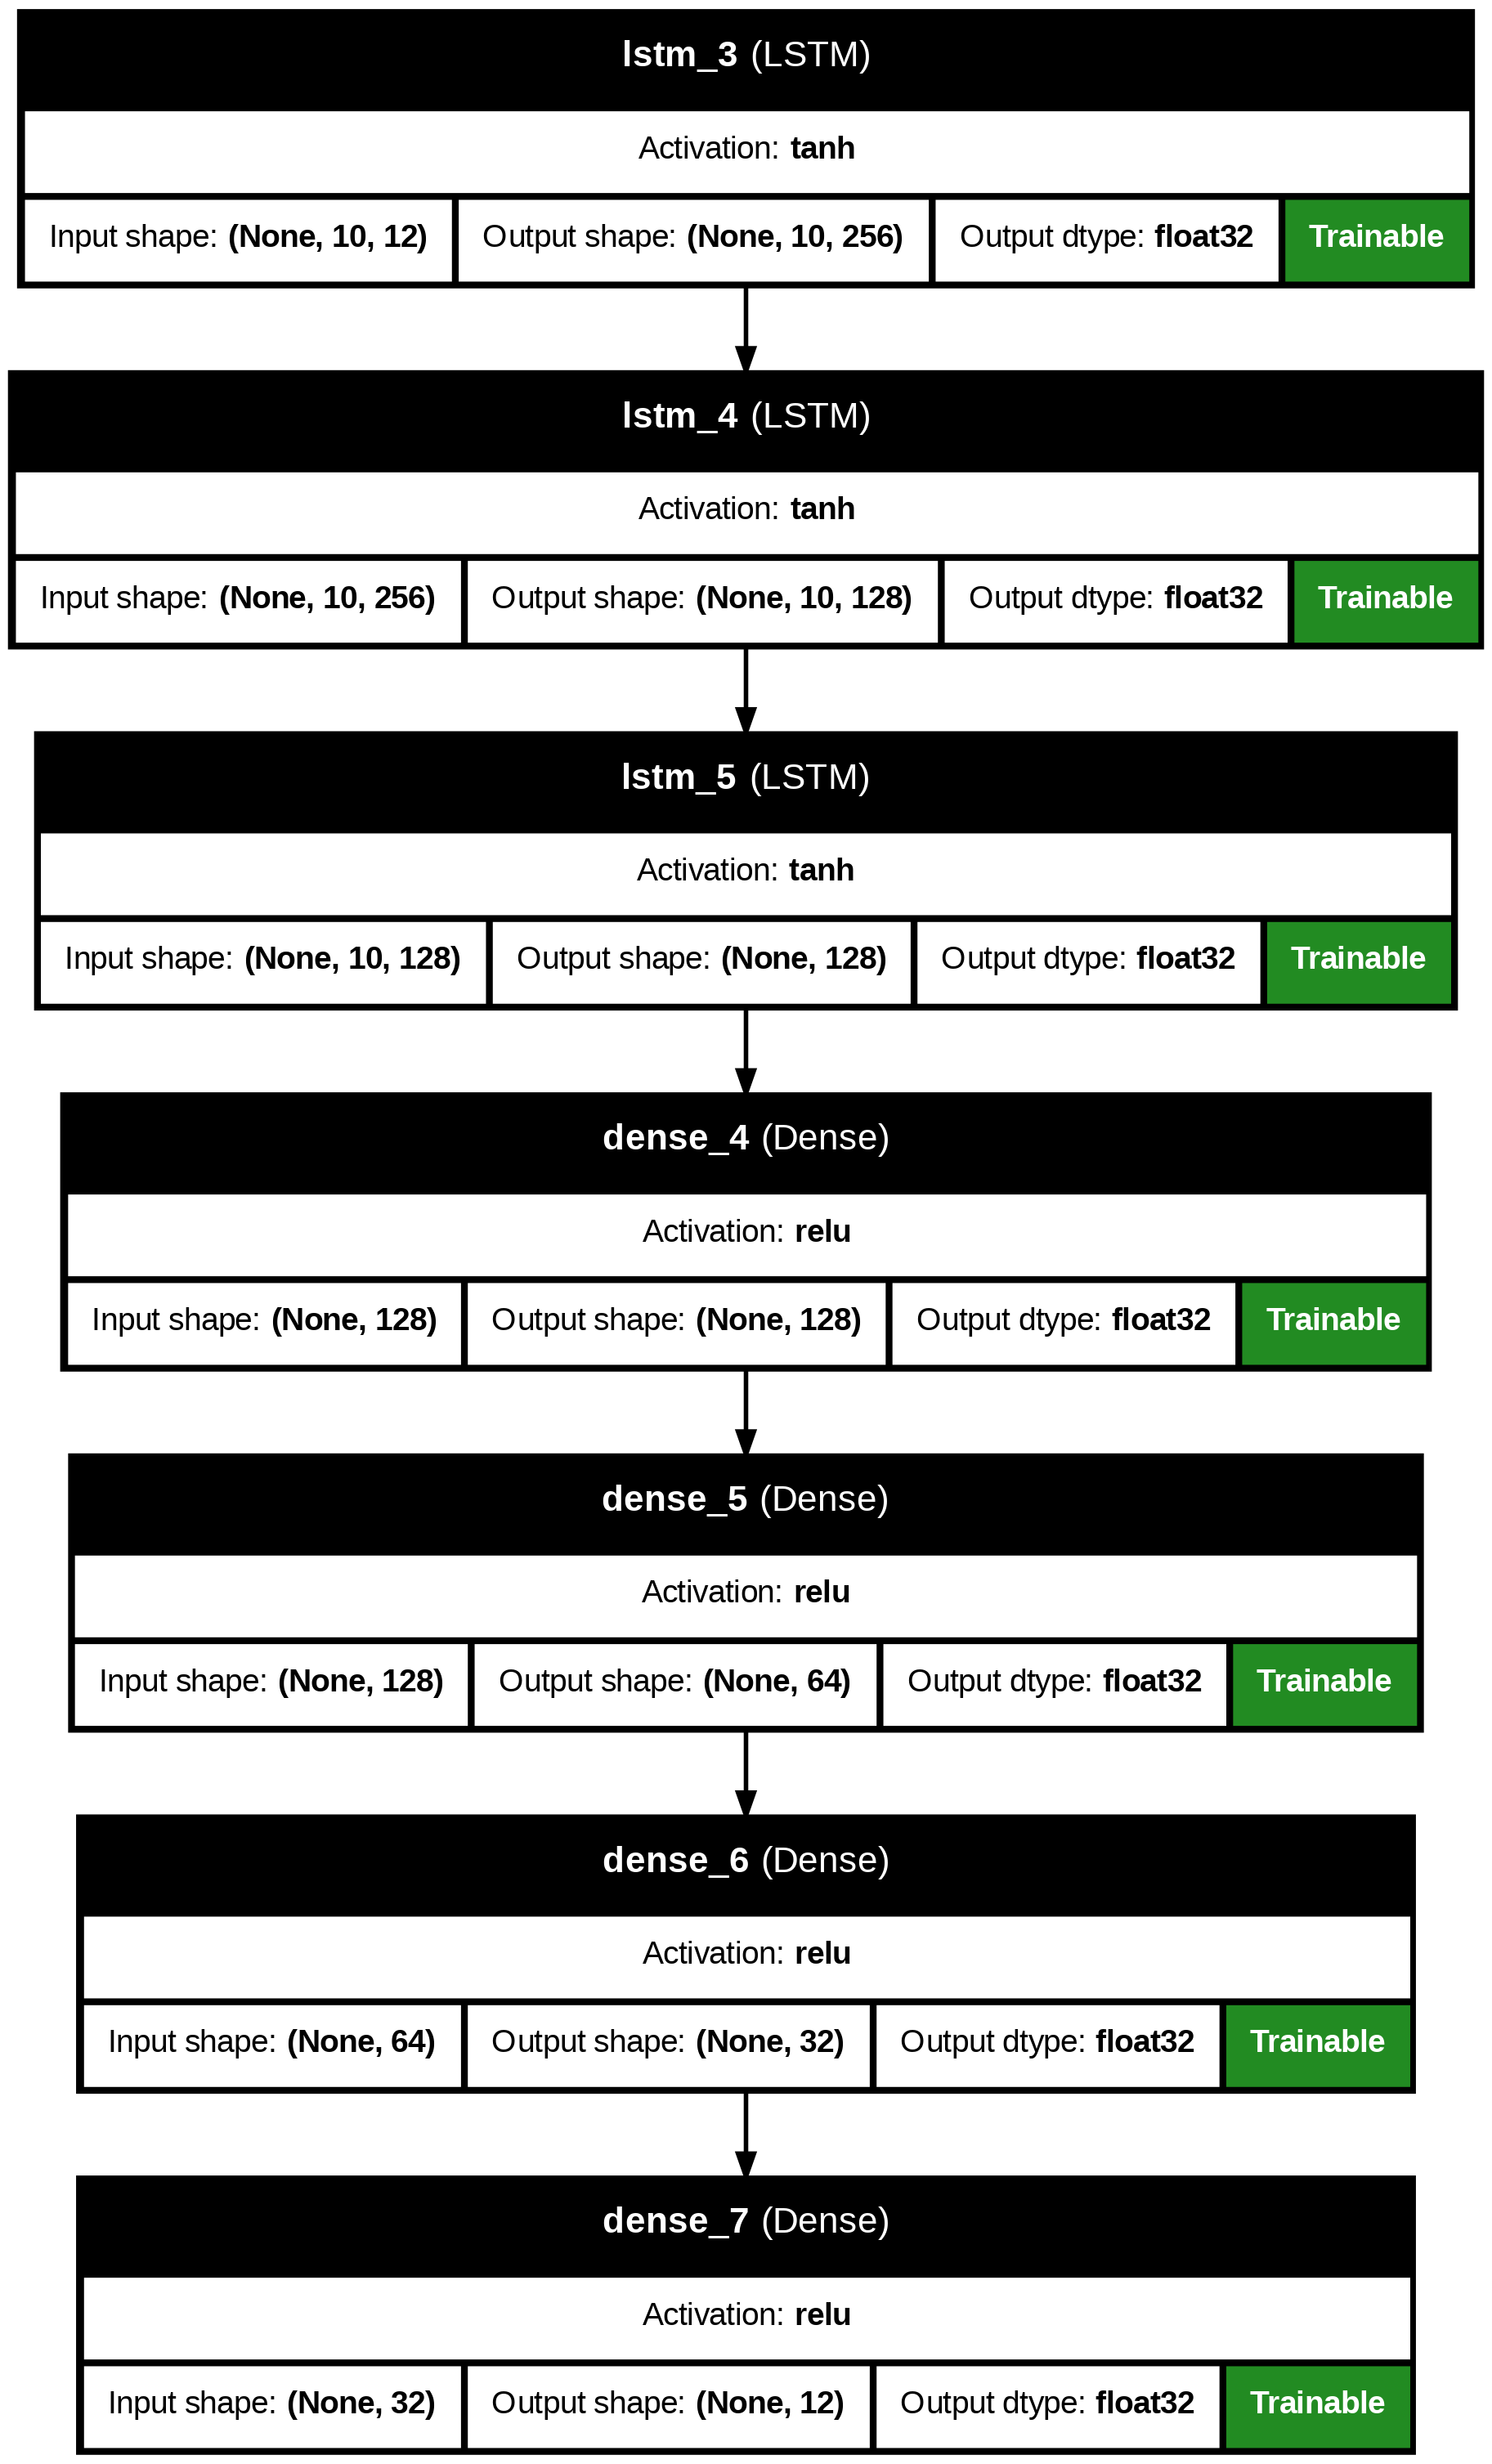

In [ ]:
tf.keras.utils.plot_model(
    model_lstm,
    to_file='model_lstm.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

### 2.1 Train

In [ ]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=4092,
    shuffle=True,
    verbose=1
)


Epoch 1/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 136ms/step - loss: 0.0924 - mae: 0.2153 - mse: 0.0924 - val_loss: 0.0570 - val_mae: 0.1759 - val_mse: 0.0570
Epoch 2/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 133ms/step - loss: 0.0572 - mae: 0.1764 - mse: 0.0572 - val_loss: 0.0575 - val_mae: 0.1796 - val_mse: 0.0575
Epoch 3/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 133ms/step - loss: 0.0572 - mae: 0.1765 - mse: 0.0572 - val_loss: 0.0571 - val_mae: 0.1750 - val_mse: 0.0571
Epoch 4/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 133ms/step - loss: 0.0572 - mae: 0.1764 - mse: 0.0572 - val_loss: 0.0571 - val_mae: 0.1773 - val_mse: 0.0571
Epoch 5/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 133ms/step - loss: 0.0571 - mae: 0.1764 - mse: 0.0571 - val_loss: 0.0571 - val_mae: 0.1747 - val_mse: 0.0571
Epoch 6/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

### 2.2. Metrics

#### 2.2.1 Loss

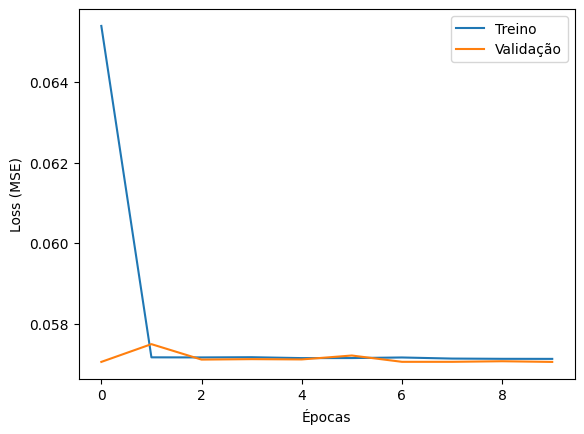

In [ ]:
plt.plot(history_lstm.history["loss"], label="Treino")
plt.plot(history_lstm.history["val_loss"], label="Valida√ß√£o")
plt.xlabel("√âpocas")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

#### 2.2.2 MAE

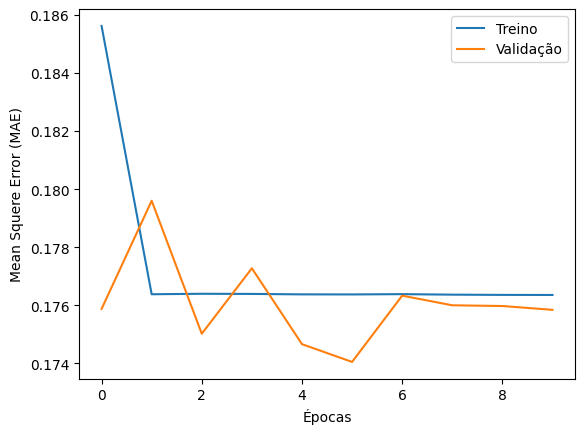

In [ ]:
plt.plot(history_lstm.history["mae"], label="Treino")
plt.plot(history_lstm.history["val_mae"], label="Valida√ß√£o")
plt.xlabel("√âpocas")
plt.ylabel("Mean Squere Error (MAE)")
plt.legend()
plt.show()

#### 2.2.3 RMSE

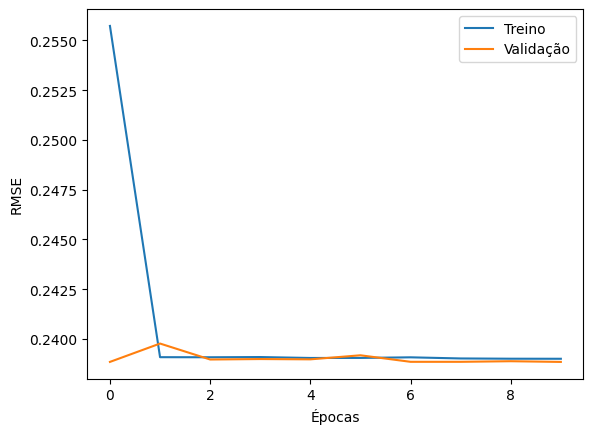

In [ ]:
# Calcula RMSE para treino e valida√ß√£o
rmse_train = np.sqrt(history_lstm.history['mse'])
rmse_val = np.sqrt(history_lstm.history['val_mse'])

# Plot
plt.plot(rmse_train, label="Treino")
plt.plot(rmse_val, label="Valida√ß√£o")
plt.xlabel("√âpocas")
plt.ylabel("RMSE")
plt.legend()
plt.show()

### Saving LSTM model

In [ ]:
model_lstm.save("lstm_bike_travel.keras")

### Loading LSTM model

In [ ]:
lstm_loaded = load_model("/content/drive/MyDrive/Bike4Real/models/lstm_bike_travel.keras")

### Predict with reload model

In [ ]:
def predict_next_trip_with_input(model,
                                 last_data,
                                 input_size=5,
                                 label_size=1,
                                 scaler_x=None,
                                 scaler_y=None,
                                 is_transformer=False):
    """
    Recebe os √∫ltimos dados e prev√™ a pr√≥xima(s) viagem(ns), retornando o input junto com a sa√≠da prevista.

    Parameters:
        model (tf.keras.Model): O modelo treinado para prever a pr√≥xima viagem.
        last_data (np.ndarray): Dados das √∫ltimas viagens, com shape (input_size, 4).
        input_size (int): N√∫mero de viagens consecutivas para o input.
        label_size (int): N√∫mero de viagens para o label (pr√≥xima(s) viagem(ns)).
        scaler_x (MinMaxScaler ou None): O escalador usado para os dados de entrada (X).
        scaler_y (MinMaxScaler ou None): O escalador usado para os dados de sa√≠da (y).

    Returns:
        input_data (np.ndarray): Os dados de entrada usados para a previs√£o.
        next_trip (np.ndarray): A previs√£o da pr√≥xima viagem.
    """

    # Verifica se os dados de entrada t√™m o tamanho adequado
    if last_data.shape[0] != input_size:
        raise ValueError(f"Os dados de entrada devem ter exatamente {input_size} viagens.")

    # Se for necess√°rio, normaliza os dados de entrada
    if scaler_x is not None:
        last_data_normalized = scaler_x.transform(last_data.reshape(-1, last_data.shape[-1])).reshape(last_data.shape)
    else:
        last_data_normalized = last_data

    if not is_transformer:
        # Faz a previs√£o para o pr√≥ximo conjunto de dados
        next_trip_normalized = model.predict(last_data_normalized[np.newaxis, :, :])  # Adiciona uma dimens√£o para batch
    else:
        next_trip_normalized = model.predict([last_data_normalized[np.newaxis, :, :], last_data_normalized[np.newaxis, -1:, :]])  # Adiciona uma dimens√£o para batch

    # Desnormaliza o resultado, se o scaler_y for fornecido
    if scaler_y is not None:
        next_trip = scaler_y.inverse_transform(next_trip_normalized.reshape(-1, next_trip_normalized.shape[-1])).reshape(next_trip_normalized.shape)
    else:
        next_trip = next_trip_normalized

    # Retorna os dados de entrada e a previs√£o
    return last_data, next_trip


In [ ]:
next_trip = predict_next_trip_with_input(lstm_loaded, X_test[3, :, :], input_size=10, label_size=1, scaler_y=scaler_y)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 247ms/step


In [ ]:
travel_history = scaler_y.inverse_transform(X_test[3, :, :].reshape(-1, X_test[3, :, :].shape[-1])).reshape(X_test[3, :, :].shape)

In [ ]:
travel_history

array([[ 704.,  496., 2024.,    5.,    6.,   23.,   14., 2024.,    5.,
           6.,   23.,   18.],
       [ 704.,  496., 2024.,    5.,    7.,    3.,   24., 2024.,    5.,
           7.,    3.,   27.],
       [ 704.,  496., 2024.,    5.,    7.,   21.,   37., 2024.,    5.,
           7.,   21.,   41.],
       [ 704.,  496., 2024.,    5.,    8.,   22.,   59., 2024.,    5.,
           8.,   23.,    3.],
       [ 704.,  496., 2024.,    5.,    9.,   15.,   57., 2024.,    5.,
           9.,   16.,   26.],
       [ 704.,  496., 2024.,    5.,    9.,   15.,   57., 2024.,    5.,
           9.,   16.,   26.],
       [ 704.,  496., 2024.,    5.,    9.,   23.,    9., 2024.,    5.,
           9.,   23.,   12.],
       [ 704.,  496., 2024.,    5.,   10.,   19.,    5., 2024.,    5.,
          10.,   19.,   11.],
       [ 704.,  496., 2024.,    5.,   11.,   18.,   34., 2024.,    5.,
          11.,   18.,   39.],
       [ 704.,  496., 2024.,    5.,   12.,   19.,    9., 2024.,    5.,
          12.,   19.

In [ ]:
next_travel = scaler_y.inverse_transform(y_test[3, :, :].reshape(-1, y_test[3, :, :].shape[-1])).reshape(y_test[3, :, :].shape)
next_travel

array([[ 704.,  496., 2024.,    5.,   12.,   21.,    4., 2024.,    5.,
          12.,   21.,    8.]])

In [ ]:
predicted_next_travel = np.round(next_trip[1])
predicted_next_travel

array([[ 265.,  273., 2024.,    5.,   18.,   15.,   30., 2024.,    5.,
          18.,   15.,   30.]], dtype=float32)

In [ ]:
np.round(np.squeeze(next_travel)),  np.round(np.squeeze(predicted_next_travel))

(array([ 704.,  496., 2024.,    5.,   12.,   21.,    4., 2024.,    5.,
          12.,   21.,    8.]),
 array([ 265.,  273., 2024.,    5.,   18.,   15.,   30., 2024.,    5.,
          18.,   15.,   30.], dtype=float32))

## 3. Transformer

#### Hiperpar√¢metros

In [ ]:
# Entrada
num_features = 12 # N√∫mero de campos presentes na sequ√™ncia de entrada
seq_len_enc = 10  # Quantidade de sequ√™ncias de entrada

# Sa√≠da
output_dim = 12   # Quantidade de campos presentes na sequencia de saida passo de saida
seq_len_dec = 1   # Quantidade da sequ√™ncia de sa√≠da

# Camadas, feed forward, etc.
num_heads = 4
ff_dim = 64
dropout_rate = 0.1
num_layers = 2

#### Positional Encoding

In [ ]:
class PositionalEncoding(Layer):
    def __init__(self, sequence_len, d_model, **kwargs):
        super().__init__(**kwargs)
        self.sequence_len = sequence_len
        self.d_model = d_model

    def get_angles(self, pos, i):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(self.d_model))
        return pos * angle_rates

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        pos = np.arange(self.sequence_len)[:, np.newaxis]
        i = np.arange(self.d_model)[np.newaxis, :]
        angle_rads = self.get_angles(pos, i)

        # Aplica seno aos √≠ndices pares; cosseno aos √≠mpares
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

        pos_encoding = angle_rads[np.newaxis, ...]  # shape: (1, seq_len, d_model)
        return inputs + tf.cast(pos_encoding, dtype=tf.float32)

# Register the layers manually
tf.keras.utils.get_custom_objects().update({
    "PositionalEncoding": PositionalEncoding,
})

#### Encoder Layer

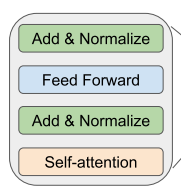

In [ ]:
@register_keras_serializable()
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, num_heads, ff_dim, dropout_rate=0.1, **kwargs):
        super().__init__(**kwargs)
        self.attention = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)
        self.norm1 = LayerNormalization()
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(ff_dim),
        ])
        self.norm2 = LayerNormalization()
        self.dropout = Dropout(dropout_rate)
        self.projection = Dense(ff_dim)

    def call(self, inputs, training=False):
        # Project input shape to ff_dim shape
        proj_inputs = self.projection(inputs)

        # attention
        attn_output = self.attention(proj_inputs, proj_inputs)

        # Add + Normalize
        out1 = self.norm1(proj_inputs + attn_output)

        # Feed Forward
        ffn_output = self.ffn(out1)

        # Dropout (n√£o presente na arquitetura proposta pelo artigo)
        ffn_output = self.dropout(ffn_output, training=training)

        # Add + Normalize
        return self.norm2(out1 + ffn_output)

# Register the layers manually
tf.keras.utils.get_custom_objects().update({
    "TransformerEncoder": TransformerEncoder,
})

#### Decoder Layer

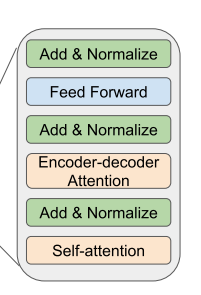

In [ ]:
@register_keras_serializable()
class TransformerDecoder(tf.keras.layers.Layer):
    def __init__(self, num_heads, ff_dim, dropout_rate=0.1, **kwargs):
        super().__init__(**kwargs)
        self.projection = Dense(ff_dim)
        self.self_attention = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)
        self.norm1 = LayerNormalization()
        self.enc_dec_attention = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)
        self.norm2 = LayerNormalization()
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(ff_dim),
        ])
        self.norm3 = LayerNormalization()
        self.dropout = Dropout(dropout_rate)

    def call(self, decoder_input, encoder_output, training=False):
        # Proje√ß√£o da entrada para o shape ff_dim
        proj_input = self.projection(decoder_input)

        # Self-Attention
        attn1 = self.self_attention(proj_input, proj_input)

        # Add + Normalize
        out1 = self.norm1(proj_input + attn1)

        # Self-Attention
        attn2 = self.enc_dec_attention(out1, encoder_output)

        # Add + Normalize
        out2 = self.norm2(out1 + attn2)

        # Feed Forward
        ffn_output = self.ffn(out2)

        # dropout
        ffn_output = self.dropout(ffn_output, training=training)

        # Add + Normalize
        return self.norm3(out2 + ffn_output)


# Register the layers manually
tf.keras.utils.get_custom_objects().update({
    "TransformerDecoder": TransformerDecoder,
})

#### Complete model (Encoder-Decoder)

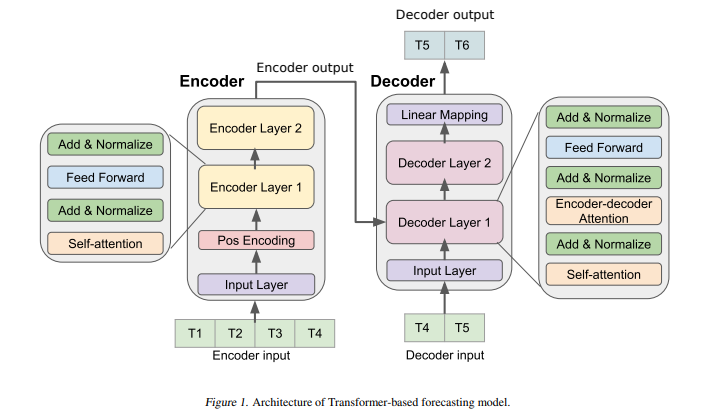

> WU, Neo et al. Deep transformer models for time series forecasting: The influenza prevalence case. arXiv preprint arXiv:2001.08317, 2020.

üìò[Deep Transformer Models for Time Series Forecasting: The Influenza Prevalence Case](https://arxiv.org/abs/2001.08317)

In [ ]:
encoder_inputs = Input(shape=(seq_len_enc, num_features), name="Encoder_Input")
decoder_inputs = Input(shape=(seq_len_dec, num_features), name="Decoder_Input")

x_enc = encoder_inputs
x_enc = Dense(ff_dim, name="Encoder_Input_Projection")(x_enc)  # Proje√ß√£o
x_enc = PositionalEncoding(seq_len_enc, ff_dim, name="Positional_Encoding")(x_enc)

for i in range(num_layers):
    x_enc = TransformerEncoder(num_heads, ff_dim, dropout_rate,  name=f"Encoder_Layer_{i+1}")(x_enc)


x_dec = decoder_inputs
x_dec = Dense(ff_dim, name="Decoder_Input_Projection")(x_dec)  # Proje√ß√£o
# x_dec = PositionalEncoding(seq_len_dec, ff_dim)(x_dec)

for i in range(num_layers):
    x_dec = TransformerDecoder(num_heads, ff_dim, dropout_rate, name=f"Decoder_Layer_{i+1}")(x_dec, x_enc)


# Sa√≠da para regress√£o multivariada
outputs = Dense(output_dim, name="Out")(x_dec)

model_transformer = Model([encoder_inputs, decoder_inputs], outputs, name='tranformers_bike')

In [ ]:
# Compila√ß√£o do modelo
model_transformer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae", "mse"])

In [ ]:
model_transformer.summary()

Model: "tranformers_bike"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ Encoder_Input             ‚îÇ (None, 10, 12)         ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Encoder_Input_Projection  ‚îÇ (None, 10, 64)         ‚îÇ            832 ‚îÇ Encoder_Input[0][0]    ‚îÇ
‚îÇ (Dense)                   ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Positional_Encoding       ‚îÇ (None, 10, 64)         ‚îÇ              0 ‚îÇ Encoder_Input_Project‚Ä¶ ‚îÇ
‚îÇ (PositionalEncoding)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Decoder_Input             ‚îÇ (None, 1, 12)          ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Encoder_Layer_1           ‚îÇ (None, 10, 64)         ‚îÇ         79,104 ‚îÇ Positional_Encoding[0‚Ä¶ ‚îÇ
‚îÇ (TransformerEncoder)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Decoder_Input_Projection  ‚îÇ (None, 1, 64)          ‚îÇ            832 ‚îÇ Decoder_Input[0][0]    ‚îÇ
‚îÇ (Dense)                   ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Encoder_Layer_2           ‚îÇ (None, 10, 64)         ‚îÇ         79,104 ‚îÇ Encoder_Layer_1[0][0]  ‚îÇ
‚îÇ (TransformerEncoder)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 451,852 (1.72 MB)

 Trainable params: 451,852 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

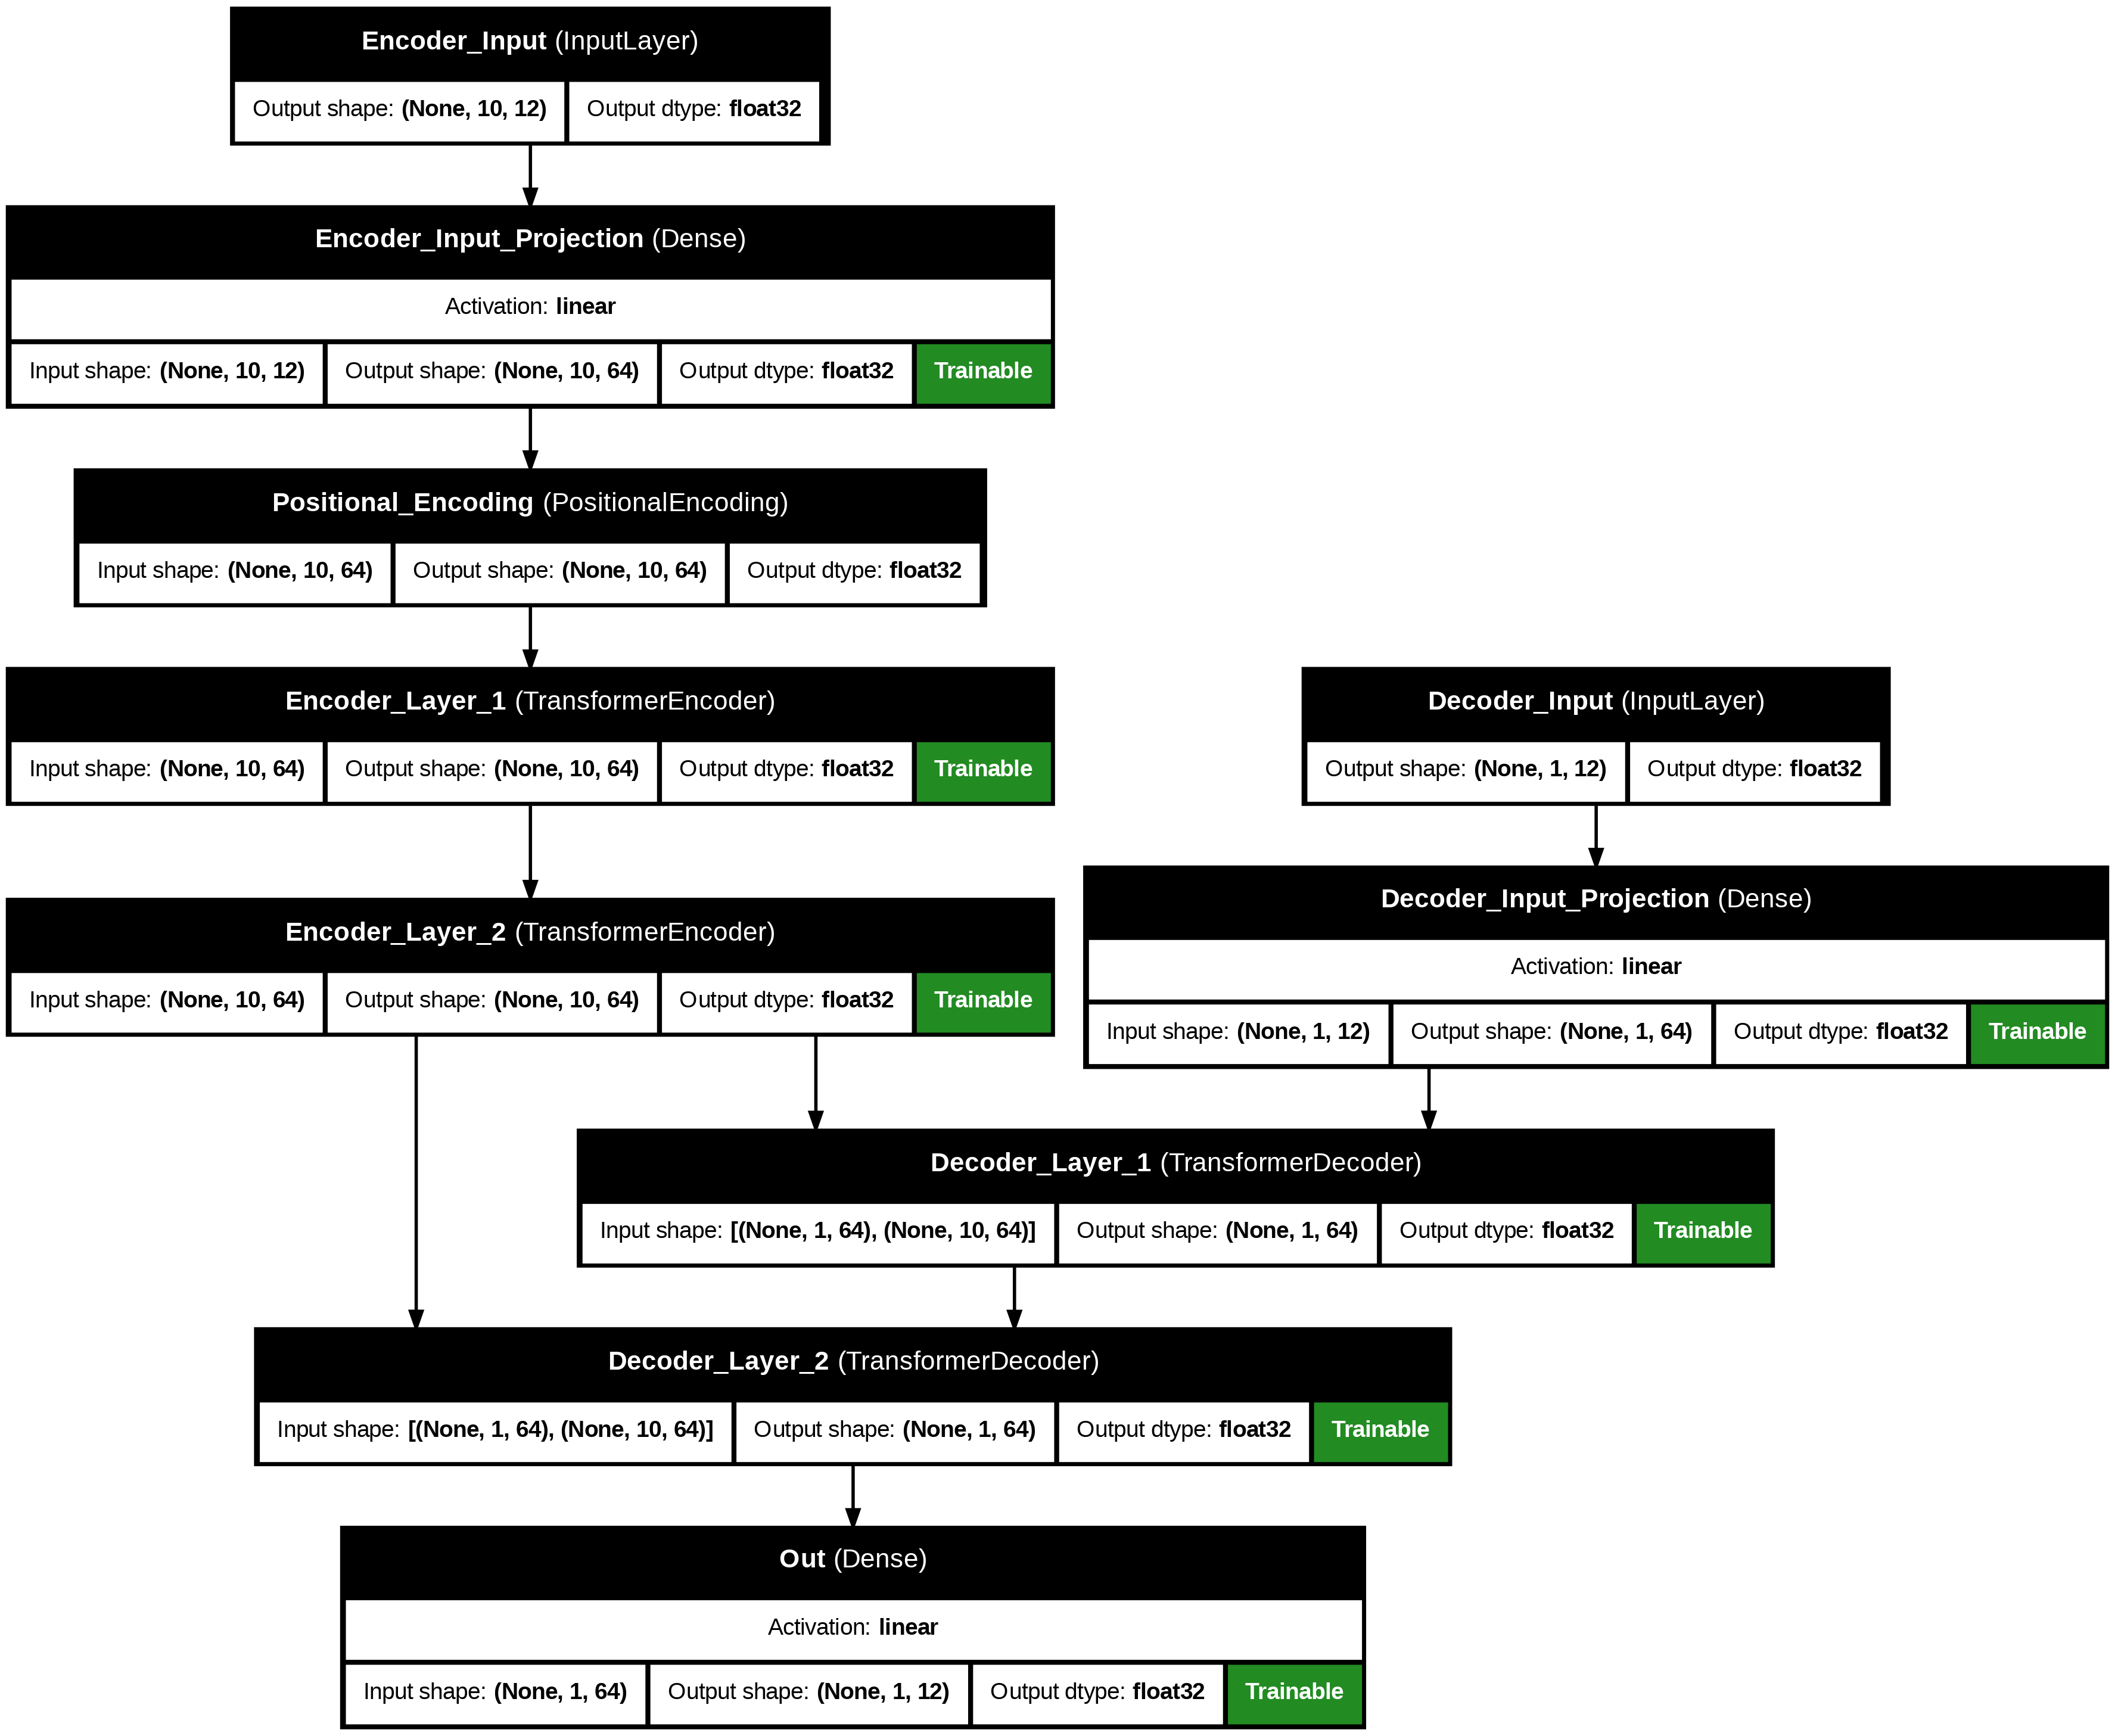

In [ ]:
tf.keras.utils.plot_model(
    model_transformer,
    to_file='model_transformer.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

### 3.1 Train and test

In [ ]:
def build_transformer_inputs(data):
    X_encoder = data[:, :10, :]  # Os 10 timesteps como entrada
    X_decoder = data[:, -1:, :]  # √öltimo timestep (10¬∫) como entrada do decoder
    return X_encoder, X_decoder

# Exemplo:
# data = np.random.rand(1000, 10, 12)  # 1000 amostras, 10 timesteps, 12 features
X_encoder_train, X_decoder_train = build_transformer_inputs(X_train)
X_encoder_test, X_decoder_test = build_transformer_inputs(X_test)

In [ ]:
history_transformer = model_transformer.fit(
    [X_encoder_train, X_decoder_train], y_train,
    validation_data=([X_encoder_test, X_decoder_test], y_test),
    epochs=10,
    batch_size=2046*2,
    shuffle=True,
    verbose=1
)

Epoch 1/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51s 101ms/step - loss: 0.1606 - mae: 0.2484 - mse: 0.1606 - val_loss: 0.0343 - val_mae: 0.1092 - val_mse: 0.0343
Epoch 2/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 43ms/step - loss: 0.0346 - mae: 0.1114 - mse: 0.0346 - val_loss: 0.0337 - val_mae: 0.1047 - val_mse: 0.0337
Epoch 3/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 43ms/step - loss: 0.0340 - mae: 0.1069 - mse: 0.0340 - val_loss: 0.0335 - val_mae: 0.1030 - val_mse: 0.0335
Epoch 4/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 43ms/step - loss: 0.0336 - mae: 0.1054 - mse: 0.0336 - val_loss: 0.0330 - val_mae: 0.1018 - val_mse: 0.0330
Epoch 5/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 43ms/step - loss: 0.0331 - mae: 0.1032 - mse: 0.0331 - val_loss: 0.0332 - val_mae: 0.1057 - val_mse: 0.0332
Epoch 6/10
272/272 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

### 3.2 Metrics

#### 3.2.1 Loss

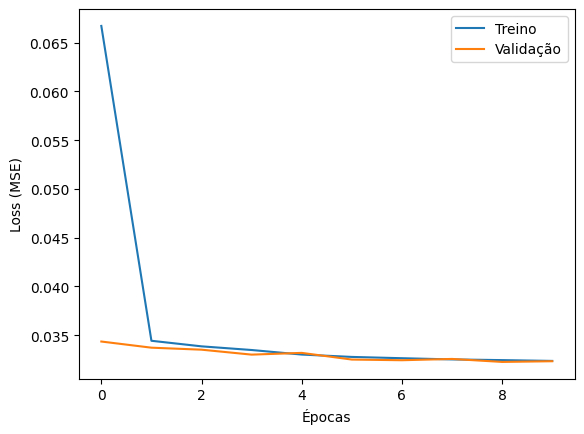

In [ ]:
plt.plot(history_transformer.history["loss"], label="Treino")
plt.plot(history_transformer.history["val_loss"], label="Valida√ß√£o")
plt.xlabel("√âpocas")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

#### 3.2.2 MAE

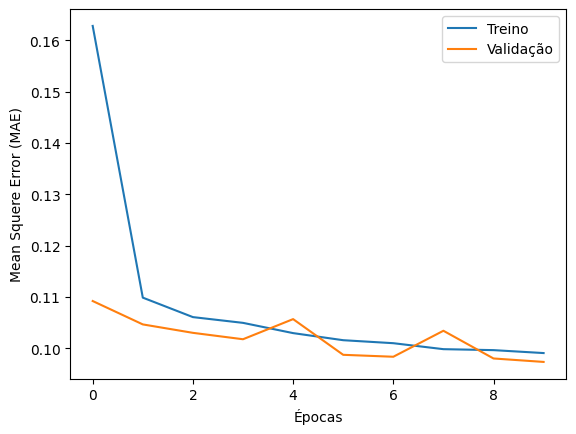

In [ ]:
plt.plot(history_transformer.history["mae"], label="Treino")
plt.plot(history_transformer.history["val_mae"], label="Valida√ß√£o")
plt.xlabel("√âpocas")
plt.ylabel("Mean Squere Error (MAE)")
plt.legend()
plt.show()

#### 3.2.3 RMSE

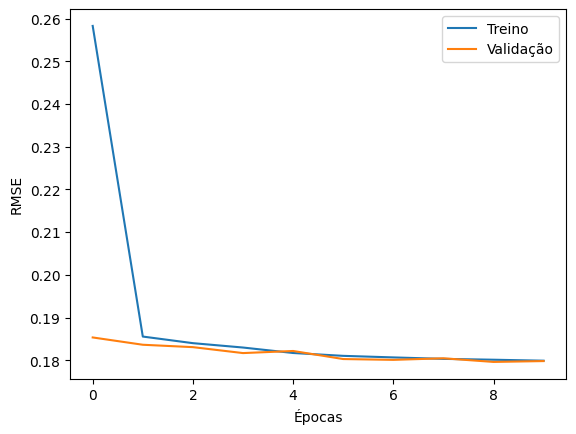

In [ ]:
# Calcula RMSE para treino e valida√ß√£o
rmse_train = np.sqrt(history_transformer.history['mse'])
rmse_val = np.sqrt(history_transformer.history['val_mse'])

# Plot
plt.plot(rmse_train, label="Treino")
plt.plot(rmse_val, label="Valida√ß√£o")
plt.xlabel("√âpocas")
plt.ylabel("RMSE")
plt.legend()
plt.show()

### Saving Transformer

In [ ]:
model_transformer.save("transformer_bike_travel.keras")

### Loading Transformer

In [ ]:
transformer_loaded = load_model("/content/drive/MyDrive/Bike4Real/models/transformer_bike_travel.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'Encoder_Layer_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'Encoder_Layer_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'Decoder_Layer_1', however the lay

### 3.3 Predict

In [ ]:
next_trip = predict_next_trip_with_input(transformer_loaded, X_test[0, :, :], input_size=10, label_size=1, scaler_y=scaler_y, is_transformer=True)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step


In [ ]:
travel_history = scaler_y.inverse_transform(X_test[3, :, :].reshape(-1, X_test[0, :, :].shape[-1])).reshape(X_test[0, :, :].shape)

In [ ]:
travel_history

array([[ 704.,  496., 2024.,    5.,    6.,   23.,   14., 2024.,    5.,
           6.,   23.,   18.],
       [ 704.,  496., 2024.,    5.,    7.,    3.,   24., 2024.,    5.,
           7.,    3.,   27.],
       [ 704.,  496., 2024.,    5.,    7.,   21.,   37., 2024.,    5.,
           7.,   21.,   41.],
       [ 704.,  496., 2024.,    5.,    8.,   22.,   59., 2024.,    5.,
           8.,   23.,    3.],
       [ 704.,  496., 2024.,    5.,    9.,   15.,   57., 2024.,    5.,
           9.,   16.,   26.],
       [ 704.,  496., 2024.,    5.,    9.,   15.,   57., 2024.,    5.,
           9.,   16.,   26.],
       [ 704.,  496., 2024.,    5.,    9.,   23.,    9., 2024.,    5.,
           9.,   23.,   12.],
       [ 704.,  496., 2024.,    5.,   10.,   19.,    5., 2024.,    5.,
          10.,   19.,   11.],
       [ 704.,  496., 2024.,    5.,   11.,   18.,   34., 2024.,    5.,
          11.,   18.,   39.],
       [ 704.,  496., 2024.,    5.,   12.,   19.,    9., 2024.,    5.,
          12.,   19.

In [ ]:
next_travel = scaler_y.inverse_transform(y_test[3, :, :].reshape(-1, y_test[0, :, :].shape[-1])).reshape(y_test[0, :, :].shape)
next_travel

array([[ 704.,  496., 2024.,    5.,   12.,   21.,    4., 2024.,    5.,
          12.,   21.,    8.]])

In [ ]:
predicted_next_travel = np.round(next_trip[1])
predicted_next_travel

array([[[  99.,  100., 2024.,    5.,   15.,   16.,   27., 2024.,    5.,
           15.,   16.,   28.]]], dtype=float32)

In [ ]:
np.round(np.squeeze(next_travel)),  np.round(np.squeeze(predicted_next_travel))

(array([ 704.,  496., 2024.,    5.,   12.,   21.,    4., 2024.,    5.,
          12.,   21.,    8.]),
 array([  99.,  100., 2024.,    5.,   15.,   16.,   27., 2024.,    5.,
          15.,   16.,   28.], dtype=float32))

## General prediction with models

In [ ]:
def general_prediction(model, X, y, scaler_y, is_transformer=False):
    random_index =  np.random.randint(0, X.shape[0])

    predicted_next_travel = predict_next_trip_with_input(model,
                                             X[random_index, :, :],
                                             input_size=10,
                                             label_size=1,
                                             scaler_y=scaler_y,
                                             is_transformer=is_transformer)





    travel_history = scaler_y.inverse_transform(X[3, :, :].reshape(-1, X[random_index, :, :].shape[-1])).reshape(X[random_index, :, :].shape)

    next_travel_real = scaler_y.inverse_transform(y[3, :, :].reshape(-1, y[random_index, :, :].shape[-1])).reshape(y[random_index, :, :].shape)
    next_travel_real = np.round(np.squeeze(next_travel_real)).astype(np.int16)

    predicted_next_travel = np.round(predicted_next_travel[1])
    predicted_next_travel = np.round(np.squeeze(predicted_next_travel)).astype(np.int16)


    est_origem_real = next_travel_real[0]
    est_destino_real = next_travel_real[1]
    saida_real = datetime(next_travel_real[2], next_travel_real[3], next_travel_real[4], next_travel_real[5], next_travel_real[6])
    chegada_real = datetime(next_travel_real[7], next_travel_real[8], next_travel_real[9], next_travel_real[10], next_travel_real[11])


    est_origem_predict = predicted_next_travel[0]
    est_destino_predict = predicted_next_travel[1]
    saida_predict = datetime(predicted_next_travel[2], predicted_next_travel[3], predicted_next_travel[4], predicted_next_travel[5], predicted_next_travel[6])
    chegada_predict = datetime(predicted_next_travel[7], predicted_next_travel[8], predicted_next_travel[9], predicted_next_travel[10], predicted_next_travel[11])


    print("Viagem real")
    print(f"üöâ Esta√ß√£o de origem (real): {est_origem_real}")
    print(f"üèÅ Esta√ß√£o de destino (real): {est_destino_real}")
    print(f"üïí Sa√≠da (real): {saida_real.strftime('%d/%m/%Y %H:%M')}")
    print(f"üïì Chegada (real): {chegada_real.strftime('%d/%m/%Y %H:%M')}")

    print("")

    print("Viagem predita")
    print(f"üöâ Esta√ß√£o de origem: {est_origem_predict}")
    print(f"üèÅ Esta√ß√£o de destino: {est_destino_predict}")
    print(f"üïí Sa√≠da: {saida_predict.strftime('%d/%m/%Y %H:%M')}")
    print(f"üïì Chegada: {chegada_predict.strftime('%d/%m/%Y %H:%M')}")


### LSTM

In [ ]:
for i in range(10):
    general_prediction(model=lstm_loaded, X=X_test, y=y_test, scaler_y=scaler_y, is_transformer=False)
    print(50*"=")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 526ms/step
Viagem real
üöâ Esta√ß√£o de origem (real): 704
üèÅ Esta√ß√£o de destino (real): 496
üïí Sa√≠da (real): 12/05/2024 21:04
üïì Chegada (real): 12/05/2024 21:08

Viagem predita
üöâ Esta√ß√£o de origem: 265
üèÅ Esta√ß√£o de destino: 272
üïí Sa√≠da: 18/05/2024 15:30
üïì Chegada: 18/05/2024 15:30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
Viagem real
üöâ Esta√ß√£o de origem (real): 704
üèÅ Esta√ß√£o de destino (real): 496
üïí Sa√≠da (real): 12/05/2024 21:04
üïì Chegada (real): 12/05/2024 21:08

Viagem predita
üöâ Esta√ß√£o de origem: 265
üèÅ Esta√ß√£o de destino: 272
üïí Sa√≠da: 18/05/2024 15:30
üïì Chegada: 18/05/2024 15:30
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
Viagem real
üöâ Esta√ß√£o de origem (real): 704
üèÅ Esta√ß√£o de destino (real): 496
üïí Sa√≠da (real): 12/05/2024 21:04
üïì Chegada (real): 12/05/2024 21:08

Vi

### Transformer

In [ ]:
for i in range(10):
    general_prediction(model=transformer_loaded, X=X_test, y=y_test, scaler_y=scaler_y, is_transformer=True)
    print(50*"=")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
Viagem real
üöâ Esta√ß√£o de origem (real): 704
üèÅ Esta√ß√£o de destino (real): 496
üïí Sa√≠da (real): 12/05/2024 21:04
üïì Chegada (real): 12/05/2024 21:08

Viagem predita
üöâ Esta√ß√£o de origem: 191
üèÅ Esta√ß√£o de destino: 84
üïí Sa√≠da: 13/05/2024 12:32
üïì Chegada: 13/05/2024 12:25
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
Viagem real
üöâ Esta√ß√£o de origem (real): 704
üèÅ Esta√ß√£o de destino (real): 496
üïí Sa√≠da (real): 12/05/2024 21:04
üïì Chegada (real): 12/05/2024 21:08

Viagem predita
üöâ Esta√ß√£o de origem: 252
üèÅ Esta√ß√£o de destino: 373
üïí Sa√≠da: 26/04/2024 15:26
üïì Chegada: 26/04/2024 15:29
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
Viagem real
üöâ Esta√ß√£o de origem (real): 704
üèÅ Esta√ß√£o de destino (real): 496
üïí Sa√≠da (real): 12/05/2024 21:04
üïì Chegada (real): 12/05/2024 21:08

Viag